<a href="https://colab.research.google.com/github/vaibhav54/NetworkTraffic-Classification-CNN-Deep-Learning/blob/main/NetworkTraffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unrar x  '/content/drive/MyDrive/Acn1.rar'


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/Acn1.rar

Creating    20class                                                   OK
Creating    20class/FLowAllLayers                                     OK
Creating    20class/FLowAllLayers/5_Mnist                             OK
Extracting  20class/FLowAllLayers/5_Mnist/t10k-images-idx3-ubyte           0%  1%  OK 
Extracting  20class/FLowAllLayers/5_Mnist/t10k-labels-idx1-ubyte           1%  OK 
Extracting  20class/FLowAllLayers/5_Mnist/train-images-idx3-ubyte          1%  2%  3%  4%  5%  6%  7%  8%  9% 10% 11%  OK 
Extracting  20class/FLowAllLayers/5_Mnist/train-labels-idx1-ubyte         11%  OK 
Creating    20class/FlowL7                                            OK
Creating    20class/FlowL7/5_Mnist                                    OK
Extracting  20class/FlowL7/5_Mnist/t10k-images-idx3-ubyte    

In [3]:
!pip install idx2numpy

  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-cp36-none-any.whl size=7905 sha256=1b93d8e13e9bbb61745aa3641f035156a6b657ad183597663583990a87ac4877
  Stored in directory: /root/.cache/pip/wheels/7a/c1/da/284ce80a748fab898b8d1fa95468a386e7cf3b81da18511f9d
Successfully built idx2numpy


In [38]:
import cv2                                         
import numpy as np                                  
import os                                          
from random import shuffle 
import idx2numpy                         
from keras.models import Sequential                 
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten,Activation
from keras.optimizers import Adam
from keras.preprocessing import image              
import matplotlib.pyplot as plt                    
import warnings
warnings.filterwarnings('ignore')
import os
from tqdm import tqdm
import matplotlib.pyplot as plt


In [39]:
dir = "/content/20class/SessionAllLayers/5_Mnist/"

train_images_dir = dir + 'train-images-idx3-ubyte'
test_images_dir = dir + "t10k-images-idx3-ubyte"

train_labels_dir = dir + "train-labels-idx1-ubyte"
test_labels_dir = dir + "t10k-labels-idx1-ubyte"

train_images = idx2numpy.convert_from_file(train_images_dir)
train_labels = idx2numpy.convert_from_file(train_labels_dir)

test_images = idx2numpy.convert_from_file(test_images_dir)
test_labels = idx2numpy.convert_from_file(test_labels_dir)


In [40]:
# train_images[0] = train_images[0]/255

In [41]:
# # train_images = train_images/255
# # test_images = test_images/255

# for index, val in enumerate(train_images):
#     train_images[index] = val/255

# for index, val in enumerate(test_images):
#     test_images[index] = val/255    


In [42]:
train_images = np.reshape(train_images, (train_images.shape[0], train_images.shape[1], train_images.shape[2],1))
test_images = np.reshape(test_images, (test_images.shape[0], test_images.shape[1], test_images.shape[2],1))


In [43]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [44]:
print(train_images.shape)
print(train_labels.shape)

print(test_images.shape)
print(test_labels.shape)

(128433, 28, 28, 1)
(128433, 20)
(14267, 28, 28, 1)
(14267, 20)


In [45]:
# TRAIN_DIR = '/content/4_Png/Train'
# TEST_DIR = '/content/4_Png/Test'

In [46]:
# train_labels, train_images = [], []
# test_labels, test_images = [], []

In [47]:
# def  create_trainData(DIR):
#      for folder in tqdm(os.listdir(DIR)):
#             for file in (os.listdir(os.path.join(DIR,folder))):
#                 if file.endswith("png"):

#     #                 image_names.append(os.path.join(TRAIN_DIR,folder,file))
#                     train_labels.append(folder)
#                     img = cv2.imread(os.path.join(DIR,folder,file), 0)
#                     train_images.append(img)
#                 else:
#                     continue

In [48]:
# def  create_testData(DIR):
#      for folder in tqdm(os.listdir(DIR)):
#             for file in (os.listdir(os.path.join(DIR,folder))):
#                 if file.endswith("png"):

#     #                 image_names.append(os.path.join(TRAIN_DIR,folder,file))
#                     test_labels.append(folder)
#                     img = cv2.imread(os.path.join(DIR,folder,file),0)
#                     test_images.append(img)
#                 else:
#                     continue

In [49]:
# create_trainData(TRAIN_DIR)
# create_testData(TEST_DIR)

In [50]:
# train_images = np.array(train_images)
# train_labels = np.array(train_labels)

# test_labels = np.array(test_labels)
# test_images = np.array(test_images)

In [51]:
# # train_images[0]/255
# # len(train_images)

# train_images = np.reshape(train_images, (182267, 28, 28,1))
# test_images = np.reshape(test_images, (20254, 28, 28,1))

# print(train_images.shape)
# print(train_labels.shape)

# print(test_images.shape)
# print(test_labels.shape)

In [52]:
model = Sequential()

model.add(Conv2D(32, (5,5), padding='same', input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (5,5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(1024))
model.add(Dropout(0.25))
model.add(Dense(20,activation='softmax'))

model.compile(optimizer=Adam(), loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
activation_3 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)             

In [53]:
history = model.fit(train_images, train_labels, validation_data=(test_images,test_labels), 
          epochs=10, batch_size=50, verbose=1)

Epoch 1/10
2569/2569 [==============================] - 10s 4ms/step - loss: 0.4601 - accuracy: 0.9209 - val_loss: 0.1043 - val_accuracy: 0.9616
Epoch 2/10
2569/2569 [==============================] - 10s 4ms/step - loss: 0.0828 - accuracy: 0.9707 - val_loss: 0.0529 - val_accuracy: 0.9794
Epoch 3/10
2569/2569 [==============================] - 10s 4ms/step - loss: 0.0820 - accuracy: 0.9734 - val_loss: 0.0598 - val_accuracy: 0.9802
Epoch 4/10
2569/2569 [==============================] - 11s 4ms/step - loss: 0.0832 - accuracy: 0.9759 - val_loss: 0.0587 - val_accuracy: 0.9813
Epoch 5/10
2569/2569 [==============================] - 10s 4ms/step - loss: 0.0706 - accuracy: 0.9795 - val_loss: 0.0616 - val_accuracy: 0.9823
Epoch 6/10
2569/2569 [==============================] - 10s 4ms/step - loss: 0.0752 - accuracy: 0.9803 - val_loss: 0.0473 - val_accuracy: 0.9823
Epoch 7/10
2569/2569 [==============================] - 10s 4ms/step - loss: 0.0810 - accuracy: 0.9809 - val_loss: 0.1185 - val_ac

In [54]:
# print(history.history.keys())

In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

pred = model.predict_classes(test_images)
test_labels = [np.argmax(i) for i in test_labels]


# print((pred[0]))        #predicted by model
# print(((test_labels[0]))) #actual 
cm = confusion_matrix(pred,test_labels)

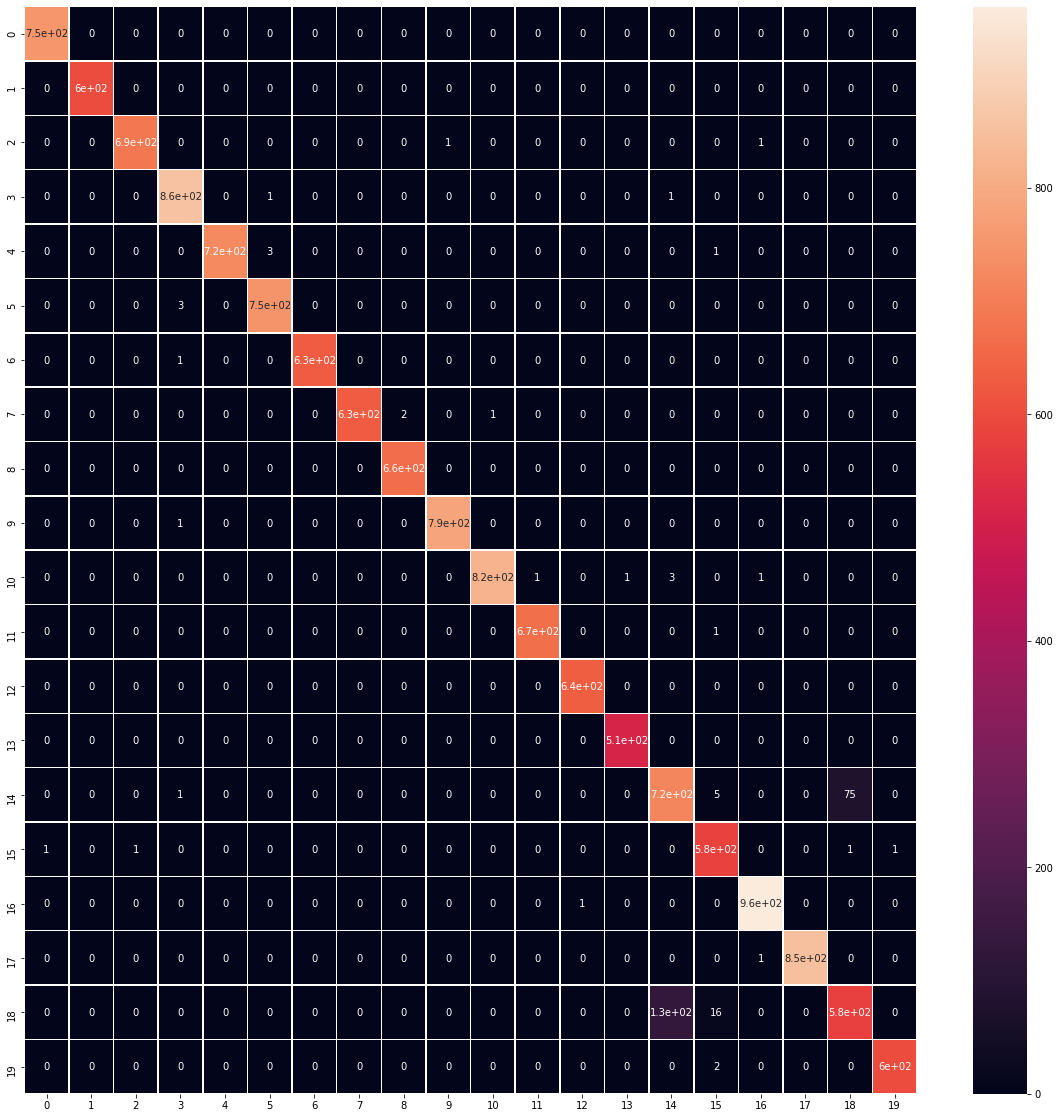

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

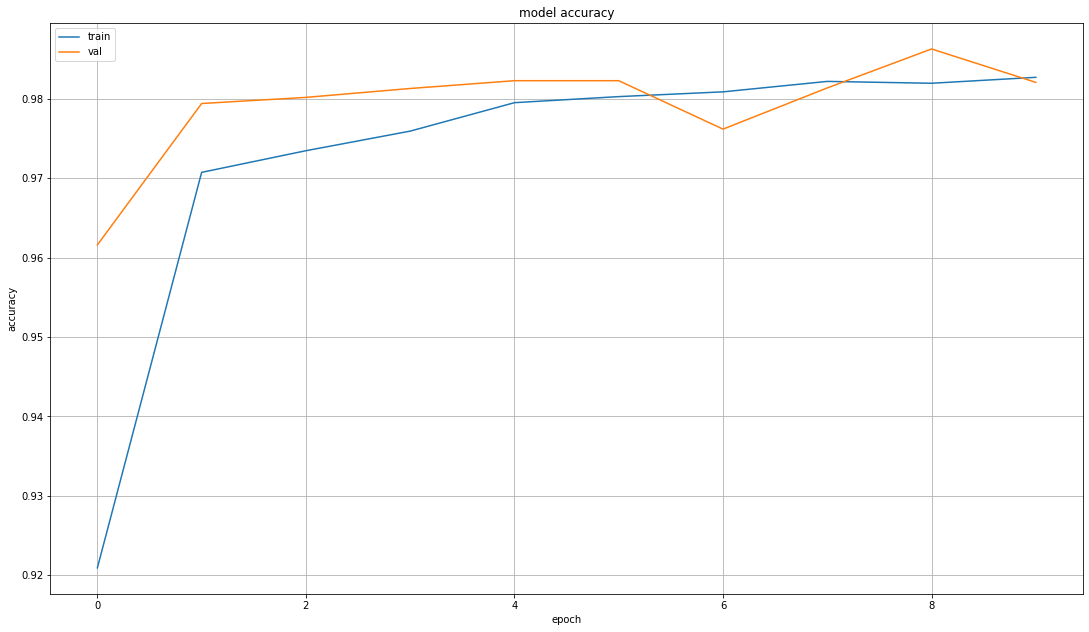

In [57]:
import keras
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
# figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

In [58]:
model.save("NetworkTraffic_ACN.h5")

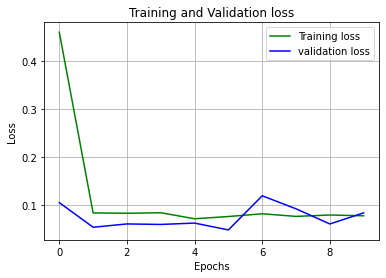

In [59]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']

plt.plot(loss_train, 'g', label='Training loss')
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()